## Flight Price Prediction(Feature Engineearing)

In [1]:
#importing besic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df=pd.read_excel('F:\\1.Study Materials\Krish Naik EDA annd Feature Engineering\Flight\Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df=pd.read_excel('F:\\1.Study Materials\Krish Naik EDA annd Feature Engineering\Flight\Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
final_df=train_df.append(test_df)
final_df.head()

C:\Users\Acer\AppData\Local\Temp/ipykernel_3304/2632932177.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
final_df[final_df.index==74]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
74,IndiGo,21/03/2019,Delhi,Cochin,DEL → BLR → COK,05:05,10:05,5h,1 stop,No info,6893.0
74,IndiGo,18/05/2019,Mumbai,Hyderabad,BOM → HYD,09:10,10:40,1h 30m,non-stop,No info,NaN


In [6]:
final_df['Date_of_Journey'].value_counts()

18/05/2019    633
6/06/2019     630
9/05/2019     628
12/06/2019    628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     355
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03/2019     255
18/03/2019    197
15/03/2019    195
01/03/2019    186
12/03/2019    185
9/04/2019     149
3/04/2019     138
21/06/2019    133
18/06/2019    127
03/03/2019    123
09/03/2019    123
06/03/2019    123
3/05/2019     117
6/04/2019     114
24/04/2019    113
15/04/2019    112
27/04/2019    109
21/04/2019    104
18/04/2019     79
12/04/2019     74
1/03/2019      59
Name: Date_of_Journey, dtype: int64

Hence it is not a time series dataset

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [8]:
## Feature Engineering Process
final_df['date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['year']=final_df['Date_of_Journey'].str.split('/').str[2]
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [9]:
final_df['date']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
final_df['month']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
final_df['year']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [10]:
final_df.date=final_df.date.astype(int)
final_df.month=final_df.month.astype(int)
final_df.year=final_df.year.astype(int)
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  date             13354 non-null  int32  
 11  month            13354 non-null  int32  
 12  year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.3+ MB


In [12]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [13]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
final_df.Arrival_Time

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [14]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [15]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
date                  0
month                 0
year                  0
dtype: int64

In [16]:
final_df['arival_hour']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[0])
final_df['arival_minutes']=final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])
final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [17]:
final_df['dep_hour']=final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['dep_minutes']=final_df['Dep_Time'].apply(lambda x:x.split(':')[1])
final_df.drop('Dep_Time',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   date             13354 non-null  int32  
 9   month            13354 non-null  int32  
 10  year             13354 non-null  int32  
 11  arival_hour      13354 non-null  object 
 12  arival_minutes   13354 non-null  object 
 13  dep_hour         13354 non-null  object 
 14  dep_minutes      13354 non-null  object 
dtypes: float64(1), int32(3), object(11)
memory usage: 1.5+ MB


In [19]:
final_df['arival_hour']=final_df['arival_hour'].astype(int)
final_df['arival_minutes']=final_df['arival_minutes'].astype(int)
final_df['dep_hour']=final_df['dep_hour'].astype(int)
final_df['dep_minutes']=final_df['dep_minutes'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   date             13354 non-null  int32  
 9   month            13354 non-null  int32  
 10  year             13354 non-null  int32  
 11  arival_hour      13354 non-null  int32  
 12  arival_minutes   13354 non-null  int32  
 13  dep_hour         13354 non-null  int32  
 14  dep_minutes      13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [20]:
final_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [21]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4,'nan':1})
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [22]:
final_df.drop('Route',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [23]:
final_df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [24]:
final_df[final_df['Duration']=='5m']
# final_df.Duration_hour.to_csv('F:\\1.Study Materials\Krish Naik EDA annd Feature Engineering\Flight\csv--.csv')

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50


In [25]:
final_df=final_df[~(final_df['Duration']=='5m')]

In [26]:
final_df['Duration_hour']=final_df['Duration'].apply(lambda x:x.split('h')[0])
final_df.Duration_hour.head()

0     2
1     7
2    19
3     5
4     4
Name: Duration_hour, dtype: object

In [27]:
final_df['Duration_hour']=final_df['Duration_hour'].astype(int)

In [28]:
# To check how meny values i  Duration actualy containing minute
final_df['Duration'].apply(lambda x:x.find('m')==-1).value_counts()

False    12068
True      1284
Name: Duration, dtype: int64

In [29]:
final_df['Duration_min']=final_df['Duration'].apply(lambda x:x[-3:-1] if x.find('m')!=-1 else 0)
final_df['Duration_min']=final_df['Duration_min'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Duration         13352 non-null  object 
 4   Total_Stops      13351 non-null  float64
 5   Additional_Info  13352 non-null  object 
 6   Price            10682 non-null  float64
 7   date             13352 non-null  int32  
 8   month            13352 non-null  int32  
 9   year             13352 non-null  int32  
 10  arival_hour      13352 non-null  int32  
 11  arival_minutes   13352 non-null  int32  
 12  dep_hour         13352 non-null  int32  
 13  dep_minutes      13352 non-null  int32  
 14  Duration_hour    13352 non-null  int32  
 15  Duration_min     13352 non-null  int32  
dtypes: float64(2), int32(9), object(5)
memory usage: 1.3+ MB


From Observation it seen that there is duplicate values

In [30]:
final_df[final_df.index==74]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,Duration_min
74,IndiGo,Delhi,Cochin,5h,1.0,No info,6893.0,21,3,2019,10,5,5,5,5,0
74,IndiGo,Mumbai,Hyderabad,1h 30m,0.0,No info,NaN,18,5,2019,10,40,9,10,1,30


In [31]:
final_df.index=[x for x in range(len(final_df))]
final_df[final_df.index==74]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,Duration_min
74,IndiGo,Delhi,Cochin,5h,1.0,No info,6893.0,21,3,2019,10,5,5,5,5,0


In [32]:
final_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13342, 13343, 13344, 13345, 13346, 13347, 13348, 13349, 13350,
            13351],
           dtype='int64', length=13352)

In [33]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [34]:
final_df.drop('Duration',axis=1,inplace=True)

In [35]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [36]:
final_df.Additional_Info.value_counts()

No info                         10491
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

final_df['Airline']=encoder.fit_transform(final_df.Airline)
final_df['Source']=encoder.fit_transform(final_df.Source)
final_df['Destination']=encoder.fit_transform(final_df.Destination)
final_df['Additional_Info']=encoder.fit_transform(final_df.Additional_Info)

final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,Duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45


In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 13351
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  int32  
 1   Source           13352 non-null  int32  
 2   Destination      13352 non-null  int32  
 3   Total_Stops      13351 non-null  float64
 4   Additional_Info  13352 non-null  int32  
 5   Price            10682 non-null  float64
 6   date             13352 non-null  int32  
 7   month            13352 non-null  int32  
 8   year             13352 non-null  int32  
 9   arival_hour      13352 non-null  int32  
 10  arival_minutes   13352 non-null  int32  
 11  dep_hour         13352 non-null  int32  
 12  dep_minutes      13352 non-null  int32  
 13  Duration_hour    13352 non-null  int32  
 14  Duration_min     13352 non-null  int32  
dtypes: float64(2), int32(13)
memory usage: 991.0 KB


In [39]:
final_df['Price'].isna().value_counts()

False    10682
True      2670
Name: Price, dtype: int64

In [40]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(final_df), columns=final_df.columns)

In [41]:
df_knn_imputed['Price'].isna().sum()

0

In [42]:
df1=pd.get_dummies(df_knn_imputed,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)
df1

,Total_Stops,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,...,Destination_5.0,Additional_Info_1.0,Additional_Info_2.0,Additional_Info_3.0,Additional_Info_4.0,Additional_Info_5.0,Additional_Info_6.0,Additional_Info_7.0,Additional_Info_8.0,Additional_Info_9.0
0,0.0,3897.0,24.0,3.0,2019.0,1.0,10.0,22.0,20.0,2.0,...,1,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1.0,5.0,2019.0,13.0,15.0,5.0,50.0,7.0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,9.0,6.0,2019.0,4.0,25.0,9.0,25.0,19.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,12.0,5.0,2019.0,23.0,30.0,18.0,5.0,5.0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1.0,3.0,2019.0,21.0,35.0,16.0,50.0,4.0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13347,1.0,10287.0,6.0,6.0,2019.0,20.0,25.0,20.0,30.0,23.0,...,0,0,0,0,0,0,0,0,1,0
13348,0.0,4965.8,27.0,3.0,2019.0,16.0,55.0,14.0,20.0,2.0,...,0,0,0,0,0,0,0,0,1,0
13349,1.0,14770.8,6.0,3.0,2019.0,4.0,25.0,21.0,50.0,6.0,...,0,0,0,0,0,0,0,0,1,0
13350,1.0,11581.2,6.0,3.0,2019.0,19.0,15.0,4.0,0.0,15.0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
df1['Price'].describe()

count    13352.000000
mean      9078.592196
std       4466.267152
min       1759.000000
25%       5350.150000
50%       8531.500000
75%      12284.000000
max      79512.000000
Name: Price, dtype: float64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

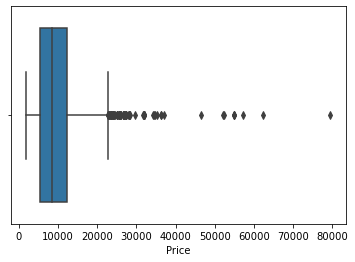

In [44]:
import seaborn as sns
sns.boxplot(df1['Price'])

In [45]:
df1[df1['Price']>25000]

,Total_Stops,Price,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,...,Destination_5.0,Additional_Info_1.0,Additional_Info_2.0,Additional_Info_3.0,Additional_Info_4.0,Additional_Info_5.0,Additional_Info_6.0,Additional_Info_7.0,Additional_Info_8.0,Additional_Info_9.0
123,1.0,27430.0,1.0,3.0,2019.0,19.0,15.0,23.0,0.0,20.0,...,0,0,0,0,0,0,0,0,1,0
396,1.0,36983.0,1.0,3.0,2019.0,19.0,15.0,12.0,50.0,6.0,...,0,0,0,0,0,0,0,0,1,0
486,1.0,26890.0,1.0,3.0,2019.0,15.0,15.0,8.0,55.0,6.0,...,1,0,0,0,0,0,0,0,1,0
510,1.0,26890.0,1.0,3.0,2019.0,12.0,25.0,7.0,0.0,5.0,...,1,0,0,0,0,0,0,0,1,0
597,2.0,25139.0,6.0,3.0,2019.0,15.0,15.0,9.0,40.0,29.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10438,1.0,31825.0,1.0,3.0,2019.0,9.0,0.0,18.0,40.0,14.0,...,1,0,0,0,0,0,0,0,1,0
10510,2.0,26480.0,1.0,3.0,2019.0,9.0,25.0,6.0,45.0,26.0,...,1,0,1,0,0,0,0,0,0,0
10972,1.0,25018.6,6.0,3.0,2019.0,4.0,25.0,23.0,5.0,5.0,...,0,0,0,0,0,1,0,0,0,0
11769,1.0,25018.6,3.0,3.0,2019.0,4.0,25.0,23.0,5.0,5.0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
model=RandomForestRegressor()

In [47]:
xTrain,xTest,yTrain,yTest=train_test_split(df_knn_imputed.drop('Price',axis=1),df_knn_imputed['Price'],test_size=0.2,random_state=42)
xTrain

,Airline,Source,Destination,Total_Stops,Additional_Info,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,Duration_min
2340,8.0,4.0,3.0,0.0,7.0,15.0,3.0,2019.0,14.0,30.0,13.0,10.0,1.0,20.0
265,6.0,2.0,1.0,1.0,8.0,21.0,3.0,2019.0,1.0,35.0,11.0,40.0,13.0,55.0
4023,4.0,2.0,1.0,2.0,5.0,1.0,6.0,2019.0,12.0,35.0,5.0,30.0,7.0,5.0
10397,3.0,2.0,1.0,0.0,8.0,15.0,5.0,2019.0,17.0,40.0,14.0,25.0,3.0,15.0
7406,10.0,4.0,3.0,1.0,8.0,6.0,3.0,2019.0,22.0,55.0,11.0,55.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2.0,3.0,0.0,1.0,8.0,1.0,4.0,2019.0,7.0,45.0,23.0,30.0,8.0,15.0
5191,4.0,3.0,0.0,1.0,5.0,9.0,5.0,2019.0,20.0,45.0,14.0,5.0,6.0,40.0
5390,6.0,2.0,1.0,1.0,8.0,15.0,5.0,2019.0,1.0,30.0,12.0,50.0,12.0,40.0
860,3.0,0.0,5.0,0.0,8.0,3.0,3.0,2019.0,3.0,25.0,0.0,40.0,2.0,45.0


In [48]:
model.fit(xTrain,yTrain)
pred=model.predict(xTest)
r2_score(yTest,pred)

0.7987405817753916

In [49]:
xTrain,xTest,yTrain,yTest=train_test_split(df1.drop('Price',axis=1),df1['Price'],test_size=0.2,random_state=42)
xTrain

,Total_Stops,date,month,year,arival_hour,arival_minutes,dep_hour,dep_minutes,Duration_hour,Duration_min,...,Destination_5.0,Additional_Info_1.0,Additional_Info_2.0,Additional_Info_3.0,Additional_Info_4.0,Additional_Info_5.0,Additional_Info_6.0,Additional_Info_7.0,Additional_Info_8.0,Additional_Info_9.0
2340,0.0,15.0,3.0,2019.0,14.0,30.0,13.0,10.0,1.0,20.0,...,0,0,0,0,0,0,0,1,0,0
265,1.0,21.0,3.0,2019.0,1.0,35.0,11.0,40.0,13.0,55.0,...,0,0,0,0,0,0,0,0,1,0
4023,2.0,1.0,6.0,2019.0,12.0,35.0,5.0,30.0,7.0,5.0,...,0,0,0,0,0,1,0,0,0,0
10397,0.0,15.0,5.0,2019.0,17.0,40.0,14.0,25.0,3.0,15.0,...,0,0,0,0,0,0,0,0,1,0
7406,1.0,6.0,3.0,2019.0,22.0,55.0,11.0,55.0,11.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1.0,1.0,4.0,2019.0,7.0,45.0,23.0,30.0,8.0,15.0,...,0,0,0,0,0,0,0,0,1,0
5191,1.0,9.0,5.0,2019.0,20.0,45.0,14.0,5.0,6.0,40.0,...,0,0,0,0,0,1,0,0,0,0
5390,1.0,15.0,5.0,2019.0,1.0,30.0,12.0,50.0,12.0,40.0,...,0,0,0,0,0,0,0,0,1,0
860,0.0,3.0,3.0,2019.0,3.0,25.0,0.0,40.0,2.0,45.0,...,1,0,0,0,0,0,0,0,1,0


In [50]:
model.fit(xTrain,yTrain)
pred=model.predict(xTest)
r2_score(yTest,pred)

0.7701598984356139